In [1]:
%matplotlib inline
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np

# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt

# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib

# pandas用ライブラリ
import pandas as pd

# データフレーム表示用関数
from IPython.display import display

# seaborn
import seaborn as sns

# 表示オプション調整

# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

# 方眼表示ON
plt.rcParams['axes.grid'] = True

# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

In [11]:
# PDF印刷用
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

try:
    from google.colab import files
except:
    pass

pdf_ind = 2
pdf_base = 'pdf-01-'

def create_pdf():
    global pdf_ind, pdf_base
    fn = f'{pdf_base}{pdf_ind:02d}.pdf'
    print(fn)
    plt.rcParams['figure.subplot.bottom'] = 0.15
    plt.rcParams['figure.subplot.left'] = 0.15
    plt.savefig(fn)
    try:
        files.download(fn)
    except:
        pass
    pdf_ind = pdf_ind + 1


In [3]:
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArViz v{az.__version__}")

Running on PyMC v5.7.2
Running on ArViz v0.15.1


In [5]:
# コンテキスト定義
model2 = pm.Model()

with model2:
    # pm.Uniform: 一様分布
    p = pm.Uniform('p', lower=0.0, upper=1.0)

    # pm.Binomial:  二項分布
    # p: 成功確率
    # n: 試行数
    X_obs = pm.Binomial('X_obs', p=p, n=50, observed=20)
    Y_pred = pm.Binomial('Y_pred', p=p, n=1000)

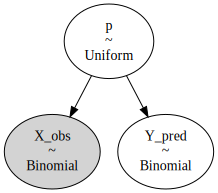

In [6]:
# モデル構造可視化
g = pm.model_to_graphviz(model2)
display(g)

In [7]:
with model2:
    idata2 = pm.sample(random_seed=42)

pdf-01-02.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

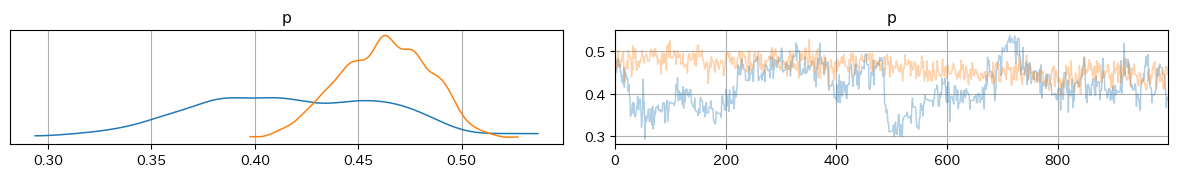

In [12]:
axes = az.plot_trace(idata2, compact=False, var_names=['p'])
plt.tight_layout();

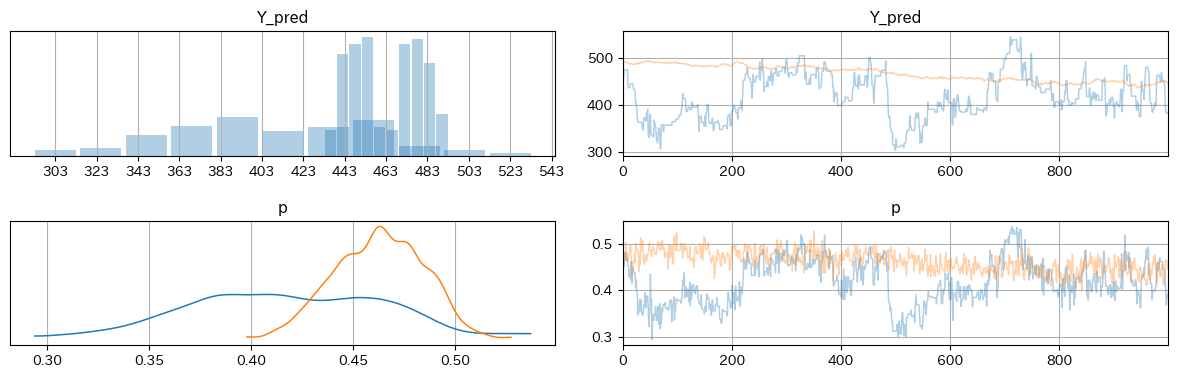

In [14]:
axes = az.plot_trace(idata2, compact=False)
plt.tight_layout();

In [15]:
# コンテキスト定義
model2 = pm.Model()

with model2:
    # pm.Uniform: 一様分布
    p = pm.Uniform('p', lower=0.0, upper=1.0)
    Y_pred = pm.Binomial('Y_pred', p=p, n=1000)
    p2 = pm.Beta('p2', alpha=Y_pred+1, beta=1001-Y_pred)



    # pm.Binomial:  二項分布
    # p: 成功確率
    # n: 試行数
    X_obs = pm.Binomial('X_obs', p=p2, n=50, observed=20)


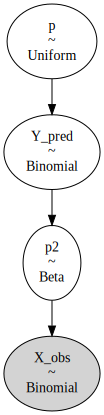

In [16]:
# モデル構造可視化
g = pm.model_to_graphviz(model2)
display(g)

In [21]:
with model2:
    idata2 = pm.sample(random_seed=42, target_accept=0.999)

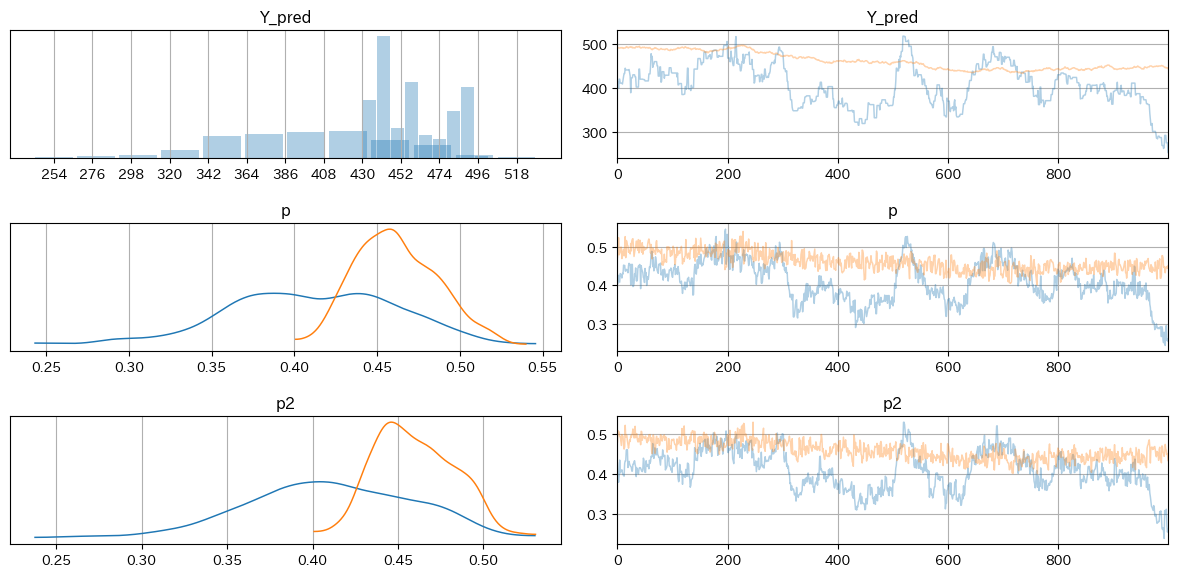

In [22]:
axes = az.plot_trace(idata2, compact=False)
plt.tight_layout();